In [11]:
import numpy as np
from interpolation.splines import eval_linear, eval_cubic
from interpolation.splines.prefilter_cubic import prefilter_cubic
from interpolation.splines.option_types import options

K = 5
f = lambda x: np.sin(abs(x*K)+0.000001)/(abs(x*K)+0.000001)

xvec = np.linspace(-1,1,10)
yvec = f(xvec)

tvec = np.linspace(-1.2,1.2,100)
grid=((-1.0, 1.0, 10),)

y_0 = f(tvec)

import xarray
len(tvec)
data = np.zeros((len(tvec), 2, 3))

for i,e in enumerate([eval_linear, eval_cubic]):
    for j,emode in enumerate([options.LINEAR, options.CONSTANT,options.NEAREST]):
        if i==1:
            c = prefilter_cubic(grid, yvec)
        else:
            c = yvec
        data[:,i,j] = e(grid, c, tvec[:,None], emode)


xdata = xarray.DataArray(data, coords=[('x',tvec),('k',[1,3]),('extrap',['Linear','Constant','Nearest'])])
xdata = xdata.transpose('k','extrap','x')
df = xdata.to_dataframe('value').reset_index()

df

,k,extrap,x,value
0,1,Linear,-1.200000,-0.207099
1,1,Linear,-1.175758,-0.205242
2,1,Linear,-1.151515,-0.203386
3,1,Linear,-1.127273,-0.201530
4,1,Linear,-1.103030,-0.199674
5,1,Linear,-1.078788,-0.197818
6,1,Linear,-1.054545,-0.195961
7,1,Linear,-1.030303,-0.194105
8,1,Linear,-1.006061,-0.192249
9,1,Linear,-0.981818,-0.190393


In [12]:
import altair as alt
from altair import datum
import pandas

In [13]:
df0 = pandas.DataFrame(
    np.row_stack([('Data',xvec[i],yvec[i]) for i in range(len(xvec))] + [('Function',tvec[i],y_0[i]) for i in range(len(tvec))]),
    columns=['fun','x','y']
)

In [14]:
df0

,fun,x,y
0,Data,-1.0,-0.19178475984314272
1,Data,-0.7777777777777778,-0.1747693324677232
2,Data,-0.5555555555555556,0.12810273435072683
3,Data,-0.33333333333333337,0.5972443588700161
4,Data,-0.11111111111111116,0.9493475148569697
5,Data,0.11111111111111116,0.9493475148569697
6,Data,0.33333333333333326,0.5972443588700164
7,Data,0.5555555555555554,0.12810273435072717
8,Data,0.7777777777777777,-0.17476933246772314
9,Data,1.0,-0.19178475984314272


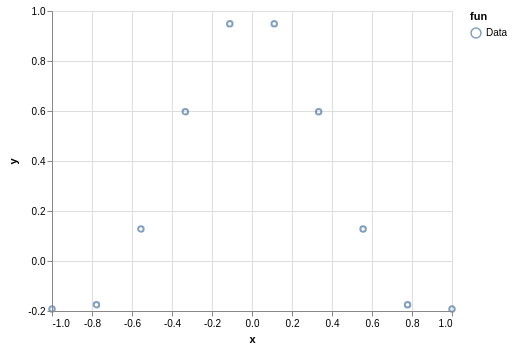

In [15]:
ch0 = alt.Chart(df0).mark_point().encode(x='x:Q',y='y:Q',color='fun:N',detail='fun').transform_filter(datum.fun=='Data')
ch0

In [16]:
sl = alt.binding_range(min=1,max=3,step=2)
single = alt.selection_single(bind=sl, fields=['k'], name='Order')

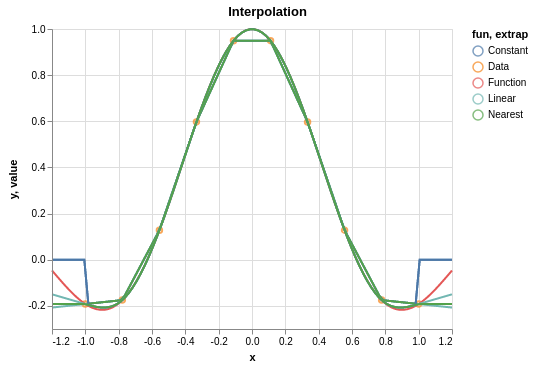

In [17]:
ch0 = alt.Chart(df0).mark_point().encode(x='x:Q',y='y:Q',color='fun:N',detail='fun').transform_filter(datum.fun=='Data')
ch00 = alt.Chart(df0).mark_line().encode(x='x:Q',y='y:Q',color='fun:N',detail='fun').transform_filter(datum.fun=='Function')
ch1 = alt.Chart(df, title='Interpolation').mark_line().encode(x='x',y='value',color='extrap', detail=('k','extrap')).add_selection(single).transform_filter(single)
# ch2 = alt.Chart(df).mark_line().encode(x='x',y='value',color='k:N',detail=('k','extrap'))
ch0+ch00+ch1